Data Cleaner Using OpenCV

In [320]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import shutil

In [ ]:
Face Detection using Haar Cascades

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\veena\AppData\Local\Temp\ipykernel_8092\1064030033.py:1: SyntaxWarning: invalid escape sequence '\S'
  image_path = "D:\Study\Projects\ImageClassification\PremierLeaguePlayersClassifier\Images\Haaland\image3.jpg"


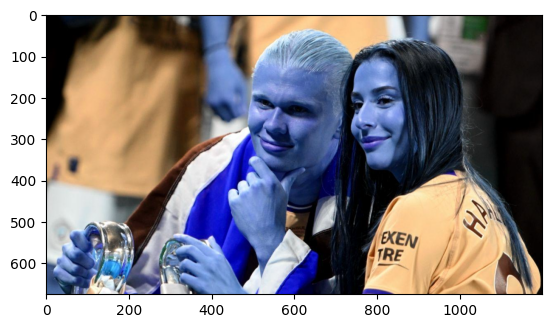

In [264]:
image_path = "D:\Study\Projects\ImageClassification\PremierLeaguePlayersClassifier\Images\Haaland\image2.jpg"
image = cv.imread(image_path)
#Displaying through cv
""" cv.imshow('Son',image)
cv.waitKey(0)
cv.destroyAllWindows() """
plt.imshow(image,cmap='grey')

(675, 1200, 3)
(390, 300)


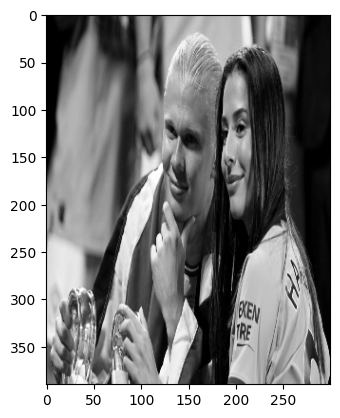

In [273]:
#Tinkering with color conversion
print(image.shape)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = cv.resize(gray_image,(300,390),interpolation=cv.INTER_LINEAR)
print(gray_image.shape)
plt.imshow(gray_image,cmap='gray')
annotated_image = gray_image.copy() # Store a copy of original image if needed to revert back to original image

In [267]:
#Using the Open CV's Cascade Classifier to extract featues like face and eyes.
face_cascade2 = cv.CascadeClassifier('D:\\Study\\Projects\\ImageClassification\\haarcascades\\haarcascade_frontalface_alt.xml')
#faces2 = face_cascade2.detectMultiScale(annotated_image,1.05,3)
print(faces)
#print(faces2)
#Now faces is an array of different face locations in the image. 
# Each element of the array contain a tuple with 4 elements (x- location, y-location width ,height) of the face detected.

[[ 67  85 128 128]]
[[178 137  49  49]]


In [321]:
def image_preprocessing(image_path):
    try:
        image = cv.imread(image_path)
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        gray_image = cv.resize(gray_image,(300,390),interpolation=cv.INTER_LINEAR)
        return gray_image
    except:
        print("Error in the image")
        return None

In [324]:
def face_detection(annotated_image):
    face_cascade = cv.CascadeClassifier('D:\\Study\\Projects\\ImageClassification\\haarcascades\\haarcascade_frontalface_default.xml')
    eyes_cascade = cv.CascadeClassifier('D:\\Study\\Projects\\ImageClassification\\haarcascades\\haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(annotated_image,1.3,3)
    print(faces)
    for face in faces:
        (x,y,w,h) = (face[0],face[1],face[2],face[3])
        face_image = cv.rectangle(annotated_image,(x,y),(x+w,y+h),(255,0,0),2)
        region_of_interest = face_image[y:y+h,x:x+w] #Extracting the region of interest - just the face region
        #eyes = eyes_cascade.detectMultiScale(region_of_interest,1.05,3) # Search for eyes only in the region of interest.
        #for (ex,ey,ew,eh) in eyes:
            #cv.rectangle(region_of_interest,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        #plt.imshow(annotated_image,cmap='gray')
        return region_of_interest    

   

In [325]:
#Detecting all folders in Images folder
path_to_data = "./Images/"
image_directory = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        image_directory.append(entry.path+"/")

#Deleting if old cropped folders if exits
for dir in image_directory:
    path_to_cr_data = dir+"cropped2/"
    path_to_unidentified_data = dir+"unidentified_image/"
    if os.path.exists(path_to_cr_data):
        shutil.rmtree(path_to_cr_data)
    os.mkdir(path_to_cr_data) 
    if os.path.exists(path_to_unidentified_data):
        shutil.rmtree(path_to_unidentified_data)
    os.mkdir(path_to_unidentified_data) 

for entry in image_directory:
   #entry is ./Images/Haaland/
   count =0
   for image_path in os.scandir(entry):
        if not image_path.is_dir():
            image = image_preprocessing(image_path)
            print(image_path)
            if image is not None:
                cropped_face = face_detection(image)
                if cropped_face is not None:
                    dest_file_name = entry+"/cropped2/image"+str(count)
                    if '.jpg' in str(image_path):
                        cv.imwrite(dest_file_name+".jpg",cropped_face)
                    elif '.png' in str(image_path):
                        cv.imwrite(dest_file_name+".png",cropped_face)
                else:
                    dest_file_name = entry+"/unidentified_image/image"+str(count)
                    if '.jpg' in str(image_path):
                        cv.imwrite(dest_file_name+".jpg",image)
                    elif '.png' in str(image_path):
                        cv.imwrite(dest_file_name+".png",image)
        count+=1 

<DirEntry 'image0.jpg'>
()
<DirEntry 'image1.jpg'>
[[137  23 110 110]]
<DirEntry 'image10.jpg'>
[[138  82  73  73]]
<DirEntry 'image11.jpg'>
()
Error in the image
<DirEntry 'image12.png'>
<DirEntry 'image13.jpg'>
[[128 140  53  53]]
<DirEntry 'image14.jpg'>
[[ 69  68 145 145]]
<DirEntry 'image15.jpg'>
[[138  82  73  73]]
<DirEntry 'image16.jpg'>
()
<DirEntry 'image17.jpg'>
()
<DirEntry 'image18.jpg'>
[[116  62  69  69]]
<DirEntry 'image19.jpg'>
[[ 92 162  77  77]]
<DirEntry 'image2.jpg'>
[[82 28 65 65]
 [81 73 53 53]]
<DirEntry 'image20.jpg'>
[[104  25  60  60]
 [161  95  53  53]]
<DirEntry 'image21.jpg'>
[[122  47  85  85]]
<DirEntry 'image22.jpg'>
[[166 104  36  36]
 [111  51  47  47]]
<DirEntry 'image23.jpg'>
[[ 87  86 122 122]]
<DirEntry 'image24.jpg'>
[[108  28  88  88]]
<DirEntry 'image25.jpg'>
()
<DirEntry 'image26.jpg'>
[[ 60  94 168 168]]
<DirEntry 'image27.jpg'>
()
<DirEntry 'image28.jpg'>
[[167 117  66  66]]
<DirEntry 'image29.jpg'>
()
<DirEntry 'image3.jpg'>
()
Error in the